In [1]:
!pip install texthero

In [2]:
# import important packages

import texthero as hero
import pandas as pd

In [4]:
# load dataset

data = pd.read_csv("data/swahili_news_dataset.csv")

In [5]:
# show top 5 rows

data.head()

,id,content,category
0,SW0,SERIKALI imesema haitakuwa tayari kuona amani...,Kitaifa
1,SW1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...",Biashara
2,SW10,SERIKALI imetoa miezi sita kwa taasisi zote z...,Kitaifa
3,SW100,KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...,michezo
4,SW1000,WATANZANIA wamekumbushwa kusherehekea sikukuu...,Kitaifa


In [6]:
# select news content only and show top 5 rows

news_content = data[["content"]]
news_content.head()

,content
0,SERIKALI imesema haitakuwa tayari kuona amani...
1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti..."
2,SERIKALI imetoa miezi sita kwa taasisi zote z...
3,KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...
4,WATANZANIA wamekumbushwa kusherehekea sikukuu...


## proprocessing

In [7]:
# clean the news content by using clean method from hero package
news_content["clean_content"] = hero.clean(news_content["content"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



The default pipeline for the clean method is the following:

- fillna(s) Replace not assigned values with empty spaces.
- lowercase(s) Lowercase all text.
- remove_digits() Remove all blocks of digits.
- remove_punctuation() Remove all string.punctuation (!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~).
- remove_diacritics() Remove all accents from strings.
- remove_stopwords() Remove all stop words.
- remove_whitespace() Remove all white space between words.

In [12]:
# show unclean and clean news content
news_content.head()

,content,clean_content
0,SERIKALI imesema haitakuwa tayari kuona amani...,serikali imesema haitakuwa tayari kuona amani ...
1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...",mkuu wa mkoa wa tabora aggrey mwanri amesitish...
2,SERIKALI imetoa miezi sita kwa taasisi zote z...,serikali imetoa miezi sita kwa taasisi zote za...
3,KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...,kampuni ya mchezo wa kubahatisha ya bet imeing...
4,WATANZANIA wamekumbushwa kusherehekea sikukuu...,watanzania wamekumbushwa kusherehekea sikukuu ...


In [10]:
# create custom pipeline
from texthero import preprocessing

custom_pipeline = [
    preprocessing.fillna,
    preprocessing.lowercase,
    preprocessing.remove_whitespace,
    preprocessing.remove_punctuation,
    preprocessing.remove_urls,
]

In [11]:
# altearnative for custom pipeline
news_content["clean_custom_content"] = news_content["content"].pipe(
    hero.clean, custom_pipeline
)

In [12]:
# show output of custome pipeline
news_content.clean_custom_content.head()

0    serikali imesema haitakuwa tayari kuona amani ...
1    mkuu wa mkoa wa tabora  aggrey mwanri amesitis...
2    serikali imetoa miezi sita kwa taasisi zote za...
3    kampuni ya mchezo wa kubahatisha ya m bet imei...
4    watanzania wamekumbushwa kusherehekea sikukuu ...
Name: clean_custom_content, dtype: object

## USEFUL PREPOCESSING METHODS

### (a) Remove Digits 


In [13]:
text = pd.Series("Hi my phone number is +255 711 111 111 call me at 09:00 am")
clean_text = hero.preprocessing.remove_digits(text)
print(clean_text)

0    Hi my phone number is +        call me at  :  am
dtype: object


### (b) Remove Stopwords


In [14]:
text = pd.Series("you need to know NLP to develop the chatbot that you desire")
clean_text = hero.remove_stopwords(text)
print(clean_text)

0     need  know NLP  develop  chatbot   desire
dtype: object


### (c) Remove URLS 

In [ ]:
text = pd.Series("Go to https://www.freecodecamp.org/news/ to read more articles you like")
clean_text = hero.remove_urls(text)
print(clean_text)

### (d)tokenize 

In [16]:
text = pd.Series(
    [
        "You can think of Texthero as a tool to help you understand and work with text-based dataset. "
    ]
)
clean_text = hero.tokenize(text)
print(clean_text)

0    [You, can, think, of, Texthero, as, a, tool, t...
dtype: object


### (e) Remove htmltags

In [17]:
text = pd.Series("<html><body><h2>hello world</h2></body></html>")
clean_text = hero.remove_html_tags(text)
print(clean_text)

0    hello world
dtype: object


## USEFUL VISUALIZATION METHODS  


### (a) Topwords


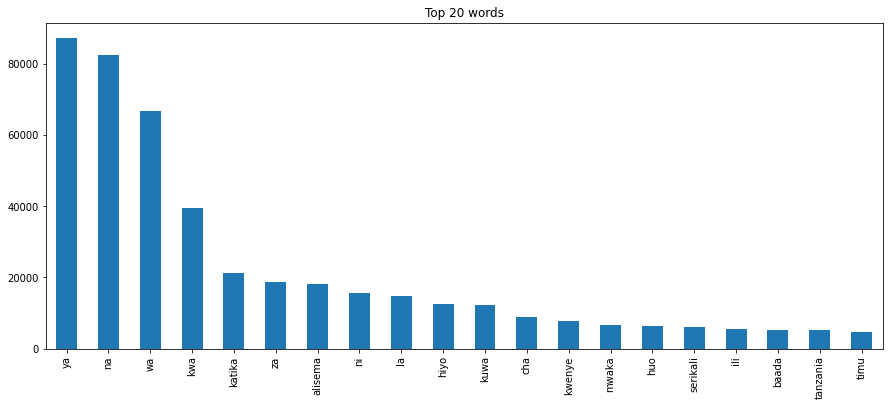

In [18]:
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams["figure.figsize"] = 15, 6

NUM_TOP_WORDS = 20

top_20 = hero.visualization.top_words(news_content["clean_content"]).head(NUM_TOP_WORDS)

# Draw the bar chart

top_20.plot.bar(rot=90, title="Top 20 words")

plt.show(block=True)

### (b) wordclouds 


In [ ]:
# Plot wordcloud image using WordCloud
hero.wordcloud(
    news_content.clean_content, max_words=100,
)

# USEFUL REPRESENTATION METHODS


### (a) TF-IDF

In [15]:
# Create a new text-based Pandas Series.

news = pd.Series(
    [
        "mkuu wa mkoa wa tabora aggrey mwanri amesitisha likizo za viongozi wote mkoani humo kutekeleza maazimio ya jukwaa la fursa za biashara la mkoa huo",
        "serikali imetoa miezi sita kwa taasisi zote za umma ambazo hazitumii mfumo wa gepg katika ukusanyaji wa fedha kufanya hivyo na baada ya hapo itafanya ukaguzi na kuwawajibisha",
    ]
)

# convert into tfidf features
hero.tfidf(news)

0    [0.187132760851739, 0.0, 0.187132760851739, 0....
1    [0.0, 0.18557550845969953, 0.0, 0.185575508459...
dtype: object

### (b) Term Frequency

In [16]:
news = pd.Series(
    [
        "mkuu wa mkoa wa tabora aggrey mwanri amesitisha likizo za viongozi wote mkoani humo kutekeleza maazimio ya jukwaa la fursa za biashara la mkoa huo",
        "serikali imetoa miezi sita kwa taasisi zote za umma ambazo hazitumii mfumo wa gepg katika ukusanyaji wa fedha kufanya hivyo na baada ya hapo itafanya ukaguzi na kuwawajibisha",
    ]
)

# Represent a text-based Pandas Series using term_frequency.
hero.term_frequency(news)

0    [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, ...
1    [0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, ...
dtype: object

### (c) Kmeans

In [22]:
column_names = ["content", "tfidf", "kmeans_labels"]

# create new dataframe called news
news = pd.DataFrame(columns=column_names)

# collect 30 clean content.
news["content"] = news_content.clean_content[:30]

# convert them into tf-idf features.
news["tfidf"] = news["content"].pipe(hero.tfidf)

# perform clustering algorithm by using kmeans()
news["kmeans_labels"] = news["tfidf"].pipe(hero.kmeans, n_clusters=5).astype(str)

In [24]:
# show content and their labels
news[["content", "kmeans_labels"]].head()

,content,kmeans_labels
0,serikali imesema haitakuwa tayari kuona amani ...,1
1,mkuu wa mkoa wa tabora aggrey mwanri amesitish...,4
2,serikali imetoa miezi sita kwa taasisi zote za...,2
3,kampuni ya mchezo wa kubahatisha ya bet imeing...,3
4,watanzania wamekumbushwa kusherehekea sikukuu ...,1


### (d) PCA

In [28]:
# perform pca
news["pca"] = news["tfidf"].pipe(hero.pca)

# show scatterplot
hero.scatterplot(
    news, "pca", color="kmeans_labels", title="Sample Swahili News in 5 groups"
)